_Connecting to myenv (Python 3.12.8)..._

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Create folder for images
os.makedirs("figures", exist_ok=True)

data_path = "../data/processed/"
ufpe = pd.read_csv(f"{data_path}ufpe1_clean.csv")

In [3]:
# ============================================
# Drive Dataset Correlation Heatmap
# ============================================
# Check all columns
print(ufpe.columns.tolist())

features = ufpe.columns.tolist()
print("Features for correlation heatmap:", features)

print("\n" + "="*50)
print("CORRELATION WITH FEATURES")
print("="*50)
corr = ufpe[features].corr()
print(corr)

['engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load', 'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1', 'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e', 'commanded_throttle_actuator', 'fuel_air_commanded_equiv_ratio', 'absolute_barometric_pressure', 'relative_throttle_position', 'intake_air_temp', 'timing_advance', 'catalyst_temperature_bank1_sensor1', 'catalyst_temperature_bank1_sensor2', 'control_module_voltage', 'commanded_evaporative_purge', 'time_run_with_mil_on', 'time_since_trouble_codes_cleared', 'distance_traveled_with_mil_on', 'warm_ups_since_codes_cleared']
Features for correlation heatmap: ['engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load', 'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1', 'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e', 'commanded_throttle_actuator', 'fuel_air_command

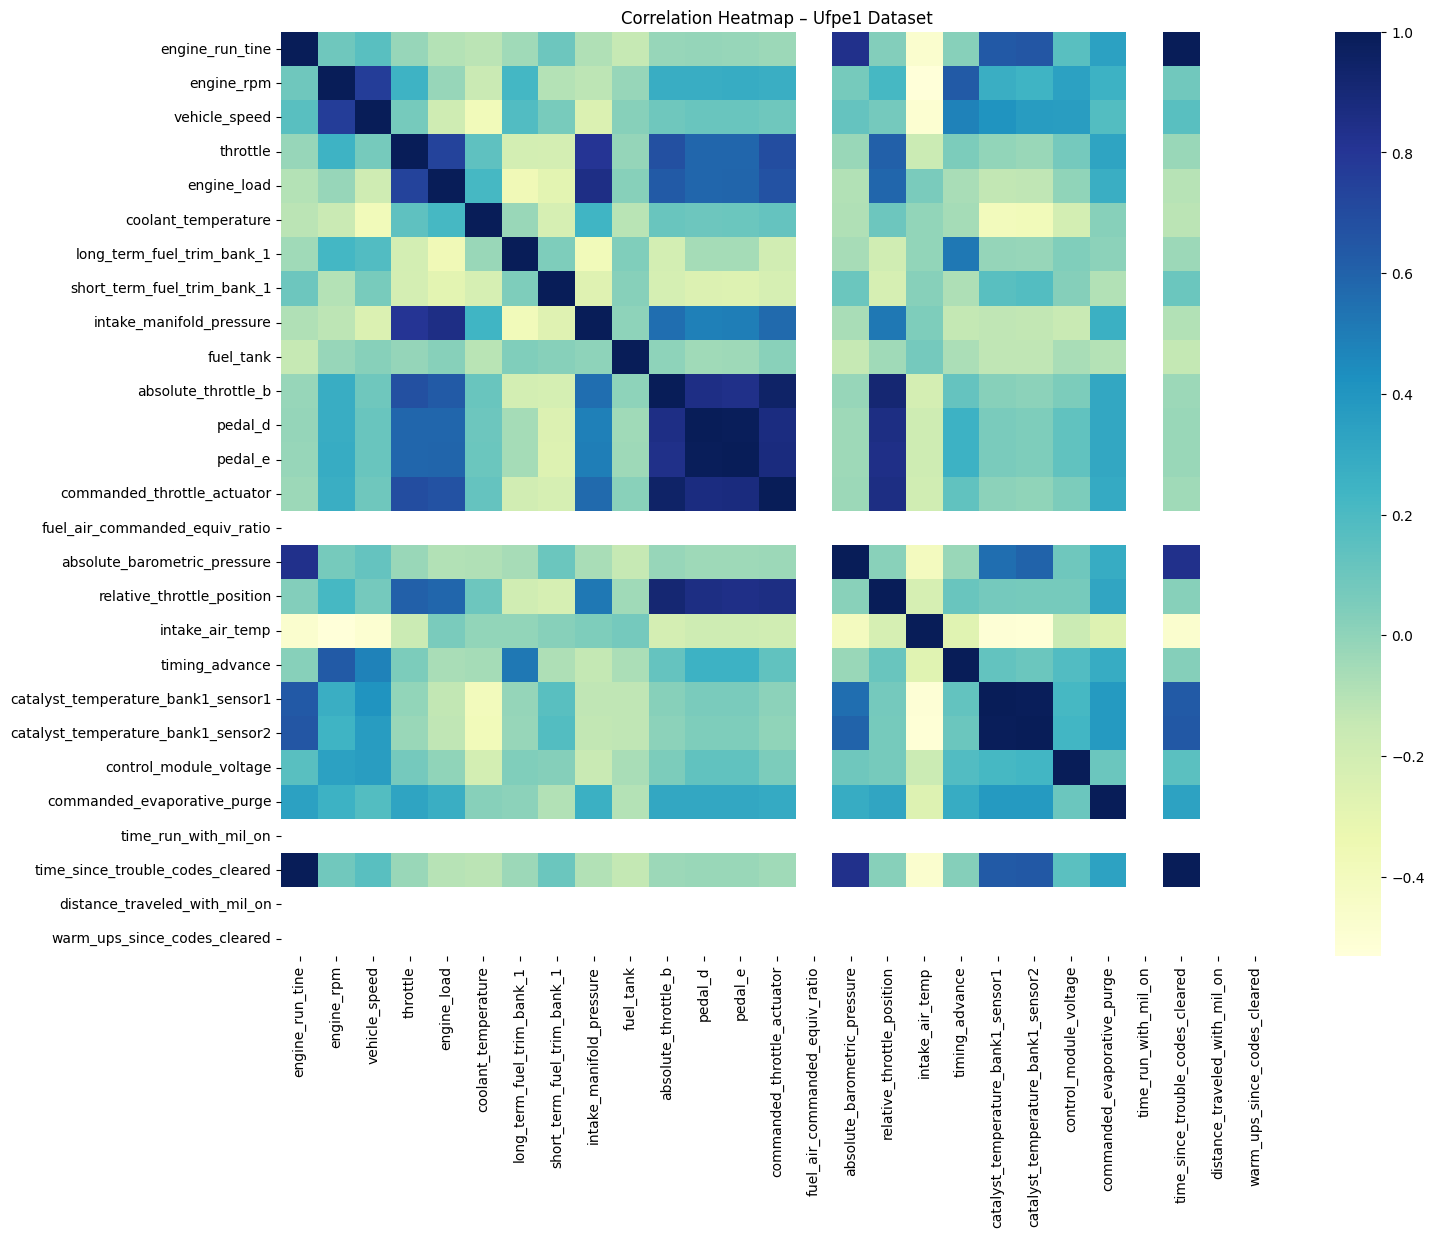

In [4]:
# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(ufpe[features].corr(), cmap='YlGnBu')
plt.title("Correlation Heatmap – Ufpe1 Dataset")
plt.savefig("figures/ufpe1_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
print("\nNaN values per column in correlation matrix:")
print(corr[features].isna().sum())

# Identify columns to drop
columns_to_drop_ufpe = [
    'fuel_air_commanded_equiv_ratio', 'time_run_with_mil_on', 
    'distance_traveled_with_mil_on', 'warm_ups_since_codes_cleared'
]


NaN values per column in correlation matrix:
engine_run_tine                        4
engine_rpm                             4
vehicle_speed                          4
throttle                               4
engine_load                            4
coolant_temperature                    4
long_term_fuel_trim_bank_1             4
short_term_fuel_trim_bank_1            4
intake_manifold_pressure               4
fuel_tank                              4
absolute_throttle_b                    4
pedal_d                                4
pedal_e                                4
commanded_throttle_actuator            4
fuel_air_commanded_equiv_ratio        27
absolute_barometric_pressure           4
relative_throttle_position             4
intake_air_temp                        4
timing_advance                         4
catalyst_temperature_bank1_sensor1     4
catalyst_temperature_bank1_sensor2     4
control_module_voltage                 4
commanded_evaporative_purge            4
time_run_wi

In [6]:
# Remove them from feature list
features_clean_ufpe = [f for f in features if f not in columns_to_drop_ufpe]

# Recompute correlation
corr_ufpe_clean = ufpe[features_clean_ufpe].corr()

print("\nCleaned correlation matrix for ufpe:")
print(corr_ufpe_clean)


Cleaned correlation matrix for ufpe:
                                    engine_run_tine  engine_rpm  \
engine_run_tine                            1.000000    0.091328   
engine_rpm                                 0.091328    1.000000   
vehicle_speed                              0.158307    0.760792   
throttle                                  -0.018173    0.251895   
engine_load                               -0.094882   -0.019597   
coolant_temperature                       -0.117086   -0.162500   
long_term_fuel_trim_bank_1                -0.041826    0.226181   
short_term_fuel_trim_bank_1                0.101917   -0.096976   
intake_manifold_pressure                  -0.086879   -0.123492   
fuel_tank                                 -0.144016   -0.019477   
absolute_throttle_b                       -0.020470    0.282359   
pedal_d                                   -0.016257    0.280774   
pedal_e                                   -0.017225    0.282600   
commanded_throttle_actua

In [7]:
##not necessary the copy but keeping for consistency
corr_matrix_ufpe = corr_ufpe_clean.copy()

# Get upper triangle of the correlation matrix
upper_tri_ufpe = corr_matrix_ufpe.where(
    np.triu(np.ones(corr_matrix_ufpe.shape), k=1).astype(bool)
)

strongest_pos_ufpe = upper_tri_ufpe.stack().sort_values(ascending=False)
print("\n" + "="*50)
print("Strongest positive correlations (UFPE):")
print("="*50)
print(strongest_pos_ufpe.head(10))

strongest_neg_ufpe = upper_tri_ufpe.stack().sort_values(ascending=True)
print("\n" + "="*50)
print("Strongest negative correlations (UFPE):")
print("="*50)
print(strongest_neg_ufpe.head(10))


Strongest positive correlations (UFPE):
engine_run_tine                     time_since_trouble_codes_cleared      0.997287
catalyst_temperature_bank1_sensor1  catalyst_temperature_bank1_sensor2    0.991880
pedal_d                             pedal_e                               0.991509
absolute_throttle_b                 commanded_throttle_actuator           0.950696
                                    relative_throttle_position            0.913801
pedal_e                             commanded_throttle_actuator           0.877294
pedal_d                             commanded_throttle_actuator           0.872489
                                    relative_throttle_position            0.859545
commanded_throttle_actuator         relative_throttle_position            0.857821
absolute_throttle_b                 pedal_d                               0.851195
dtype: float64

Strongest negative correlations (UFPE):
engine_rpm                    intake_air_temp                      -0.530

In [8]:
# ===========================================
# Scatter plots for strongest correlations
# ===========================================

os.makedirs("figures/ufpe1_scatter/positive", exist_ok=True)
os.makedirs("figures/ufpe1_scatter/negative", exist_ok=True)


Creating scatter plots for top 5 positive correlations...


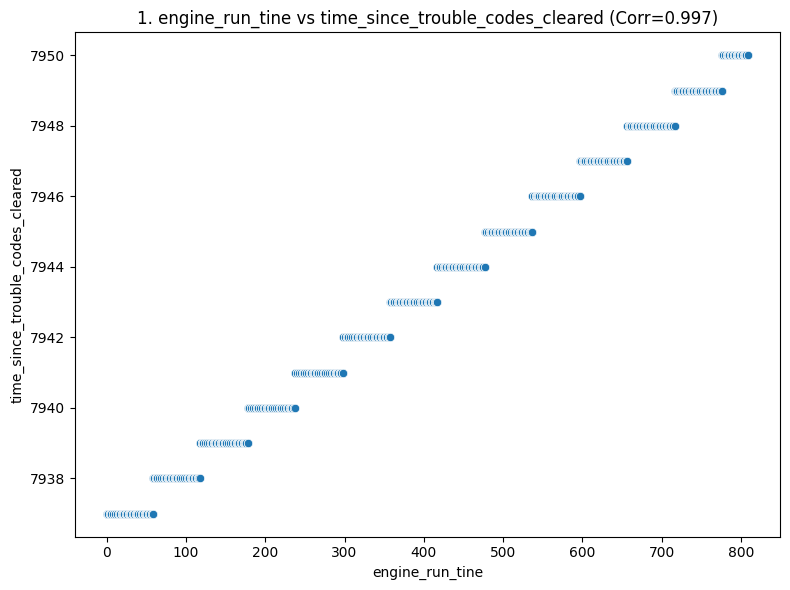

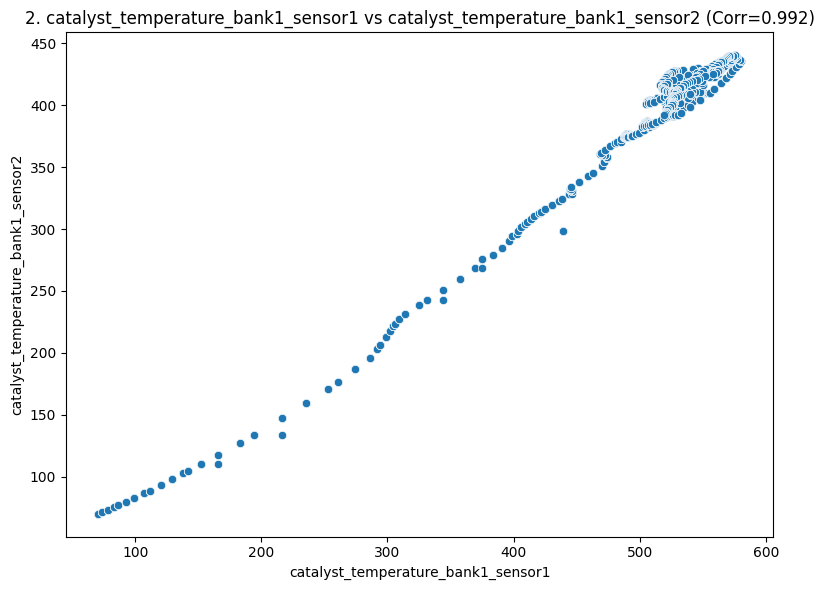

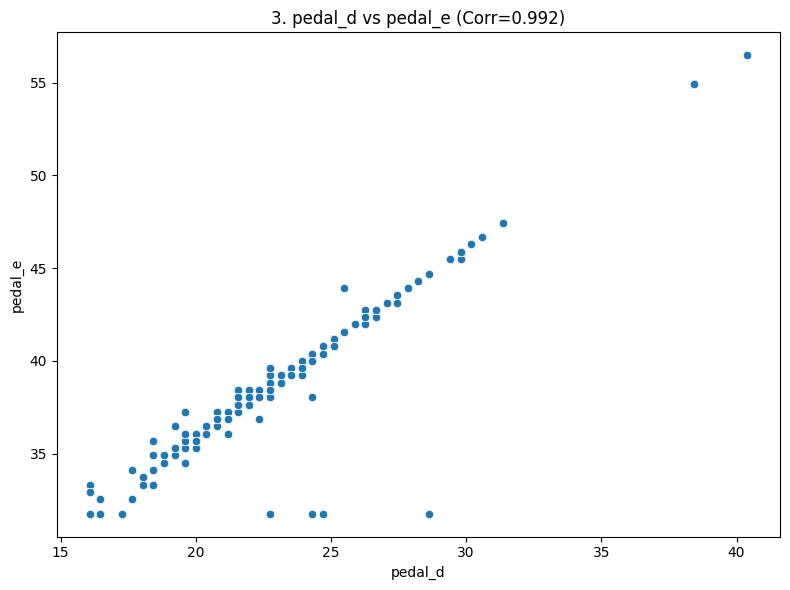

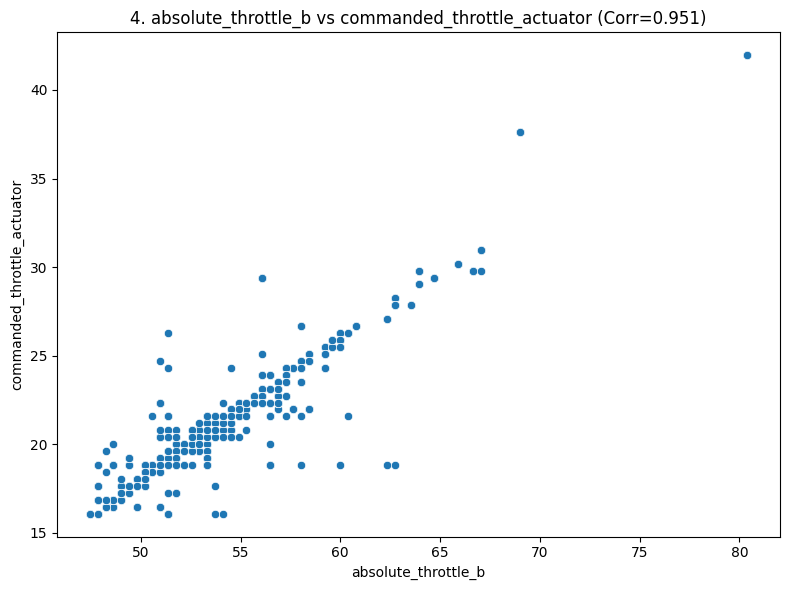

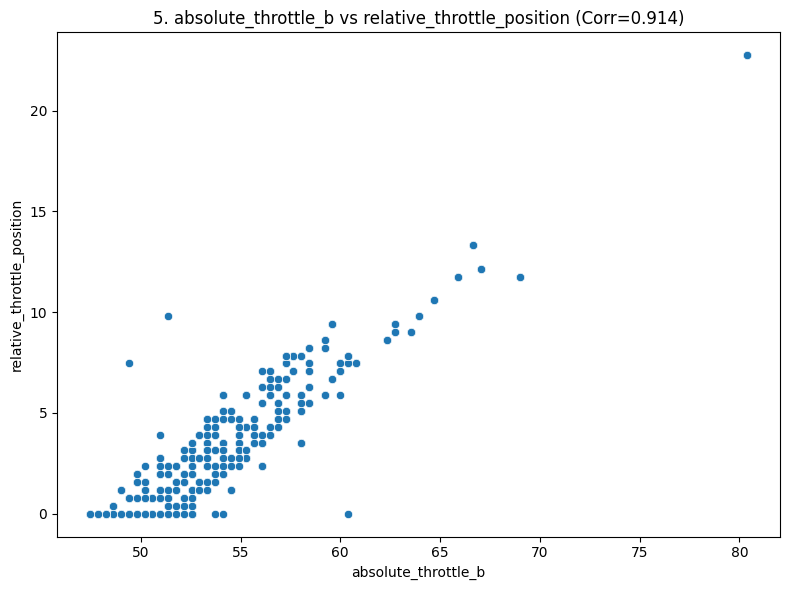

In [9]:
# Top 5 positive correlations
top5_pos = strongest_pos_ufpe.head(5)
print("\nCreating scatter plots for top 5 positive correlations...")
for i, ((col1, col2), value) in enumerate(top5_pos.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=ufpe, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/ufpe1_scatter/positive/scatter_pos{i}_{col1}_{col2}.png", dpi=300)
    plt.show()

Creating scatter plots for top 5 negative correlations...


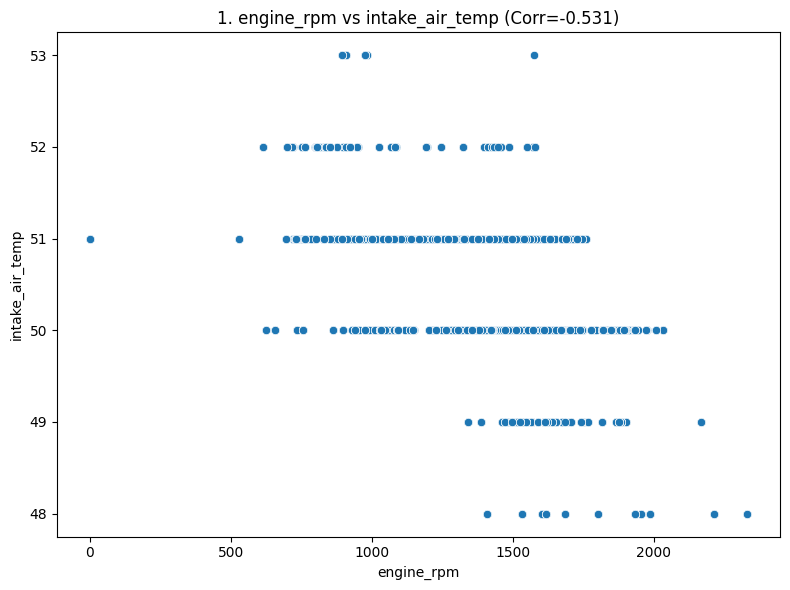

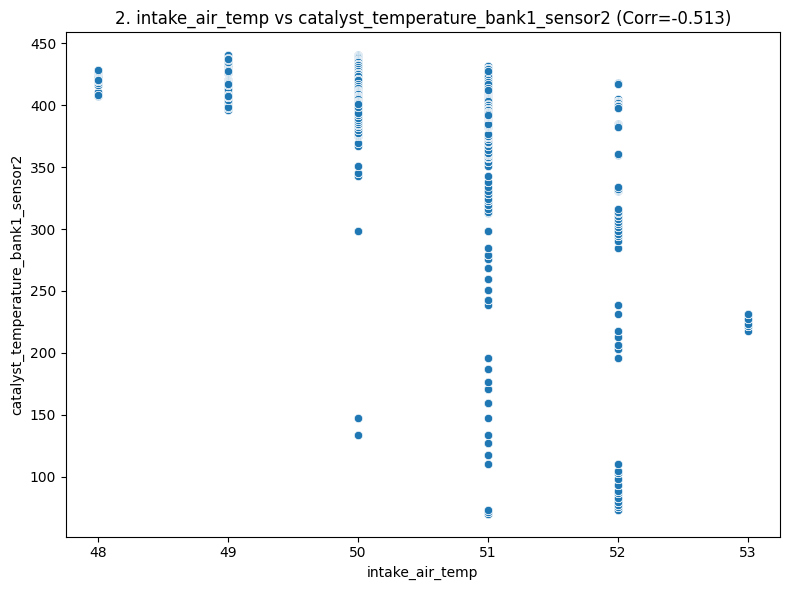

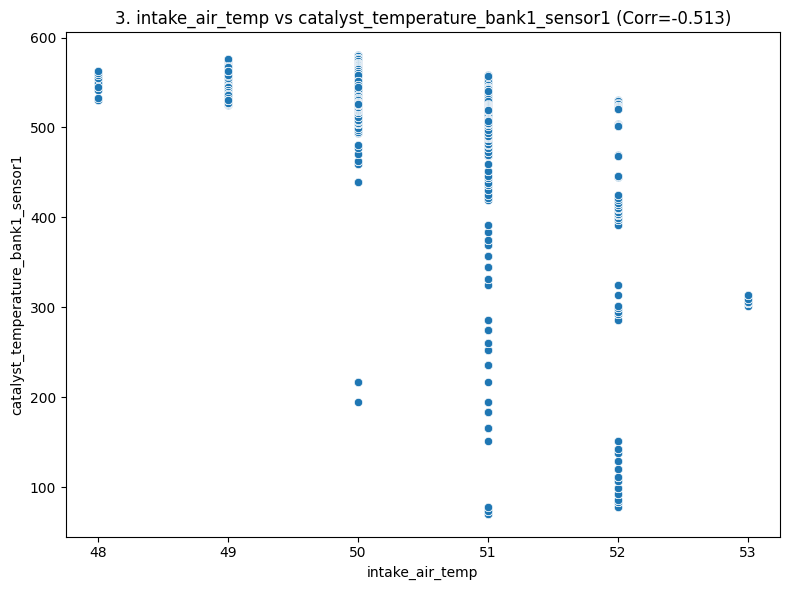

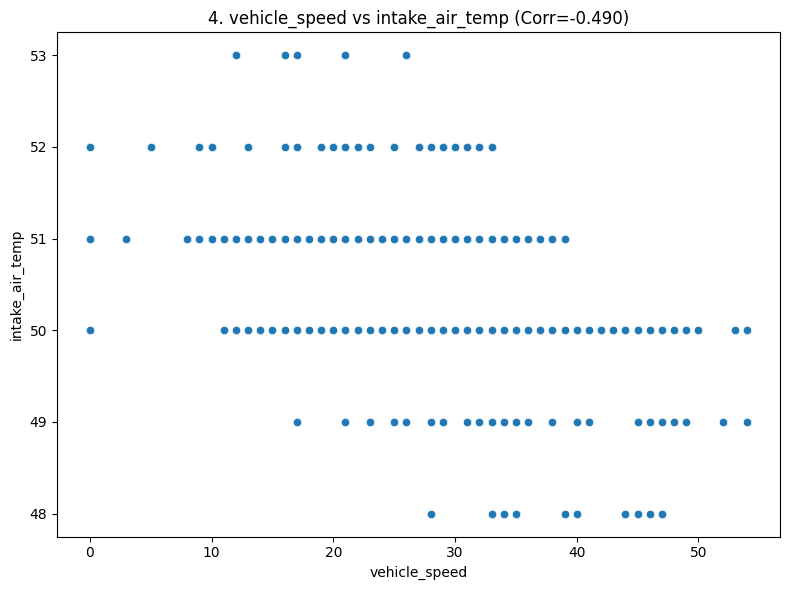

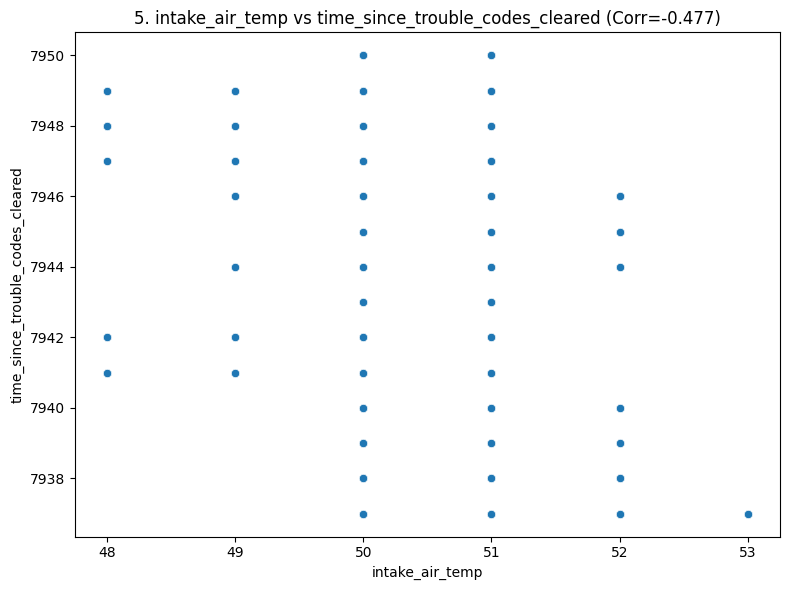

In [10]:
# Top 5 negative correlations
top5_neg = strongest_neg_ufpe.head(5)
print("Creating scatter plots for top 5 negative correlations...")
for i, ((col1, col2), value) in enumerate(top5_neg.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=ufpe, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/ufpe1_scatter/negative/scatter_neg{i}_{col1}_{col2}.png", dpi=300)
    plt.show()